In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

from plotly.subplots import make_subplots

In [11]:

# Sample data (replace this with your actual data)
movie_genres_categories = pd.read_csv("../clean_Data/movie_genres_categories.csv")

# Set Seaborn style with a white background
sns.set_style("whitegrid")


# Convert the Seaborn plot to a Plotly Express plot
fig = px.bar(movie_genres_categories, x='Genres', y='mean', title='Revenue for Each Genre',
             labels={'mean': 'Revenue'}, color_discrete_sequence=px.colors.qualitative.Set1)

# Customize the layout
fig.update_layout(xaxis_title='Genre', yaxis_title='Revenue', title_x=0.5)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45, tickmode='array')

# Save the plot as an HTML file (for interactive features)
fig.write_html('assets/plots/genre_revenue.html')

# Save the plot as an image file (e.g., PNG)
fig.write_image('assets/plots/genre_revenue.png', engine='kaleido')
fig.show()


/var/folders/g4/rzc_8mgd15n5f0l73k0mm3600000gn/T/ipykernel_87768/1027601339.py:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.


/var/folders/g4/rzc_8mgd15n5f0l73k0mm3600000gn/T/ipykernel_87768/1027601339.py:22: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




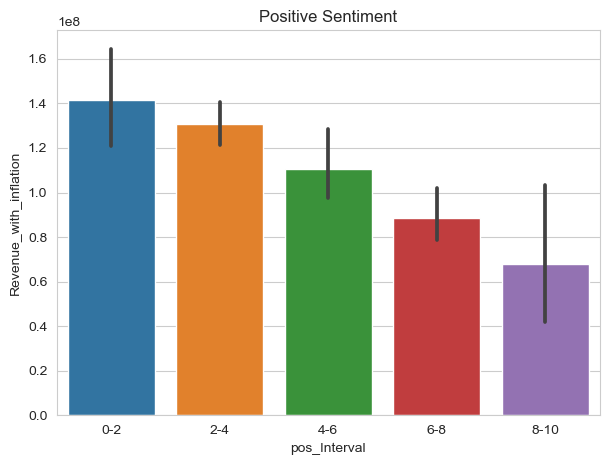

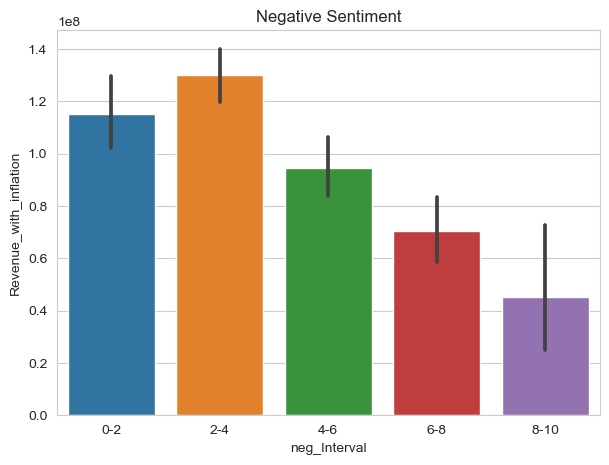

In [12]:
# Sample data (replace this with your actual data)
pos_neg_df = pd.read_csv("../clean_Data/pos_neg_revenue.csv")
columns_of_interest = ['percentage_of_positive_words', 'percentage_of_negative_words', 'percentage_of_neutral_words', 'Revenue_with_inflation']
data_to_plot = pos_neg_df[columns_of_interest]

# Set up a multi-plot grid for Positive Sentiment
fig_pos, ax_pos = plt.subplots(figsize=(7, 5))
pos_order = ['0-2', '2-4', '4-6', '6-8', '8-10']
pos_neg_df['pos_Interval'] = pd.cut(pos_neg_df['percentage_of_positive_words'], bins=[0, 0.02, 0.04, 0.05, 0.08, 0.1], labels=pos_order)
sns.barplot(x='pos_Interval', y='Revenue_with_inflation', data=pos_neg_df, ci=95, ax=ax_pos, order=pos_order)
ax_pos.set_title('Positive Sentiment')
df = pos_neg_df.groupby('pos_Interval')['Revenue_with_inflation'].mean().reset_index()

# Convert the Seaborn plot to a Plotly Express plot for Positive Sentiment
fig_pos_px = px.bar(df, x='pos_Interval', y='Revenue_with_inflation',text_auto= '.2s', title='Revenue for different percentages of positive words',
             labels={'mean': 'Revenue'}, category_orders={"pos_Interval": pos_order},color_discrete_sequence=px.colors.qualitative.Set1)

# Set up a multi-plot grid for Negative Sentiment
fig_neg, ax_neg = plt.subplots(figsize=(7, 5))
neg_order = ['0-2', '2-4', '4-6', '6-8', '8-10']
pos_neg_df['neg_Interval'] = pd.cut(pos_neg_df['percentage_of_negative_words'], bins=[0, 0.02, 0.04, 0.05, 0.08, 0.1], labels=neg_order)
sns.barplot(x='neg_Interval', y='Revenue_with_inflation', data=pos_neg_df, ci=95, ax=ax_neg, order=neg_order)
ax_neg.set_title('Negative Sentiment')

df = pos_neg_df.groupby('neg_Interval')['Revenue_with_inflation'].mean().reset_index()

# Convert the Seaborn plot to a Plotly Express plot for Positive Sentiment
fig_neg_px = px.bar(df, x='neg_Interval', y='Revenue_with_inflation',text_auto= '.2s', title='Revenue for different percentages of positive words',
             labels={'mean': 'Revenue'}, category_orders={"neg_Interval": pos_order},color_discrete_sequence=px.colors.qualitative.Set1)



In [13]:
# Create a figure with subplots
fig = make_subplots()

# Add a trace for each plot (only one will be visible at a time)
for trace in fig_neg_px.data:
    fig.add_trace(trace)

for trace in fig_pos_px.data:
    fig.add_trace(trace)

# Update layout to add a button that will switch between plots
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=[{"visible": [True] * len(fig_neg_px.data) +
                                       [False] * len(fig_pos_px.data)}],
                    label="Mean Revenue",
                    method="update"
                ),
                dict(
                    args=[{"visible": [False] * len(fig_neg_px.data) +
                                       [True] * len(fig_pos_px.data)}],
                    label="Log Revenue",
                    method="update"
                ),
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.2,
            yanchor="top"
        ),
    ],
    barmode='relative',
    bargap=0.15,  
)

# Set titles and axis labels here if needed, since they might be removed by the previous updates
fig.update_layout(
    title_text="Revenue for negative and positive sentiments",
    title_x=0.5,  # Centers the title
    xaxis_title="Percentage of negative / positive words",
    yaxis_title="Revenue",
    updatemenus=[dict(
        buttons=list([
            dict(
                args=[{"visible": [True]*len(fig_neg_px.data) + [False]*len(fig_pos_px.data)}],
                label="Negative words",
                method="update"
            ),
            dict(
                args=[{"visible": [False]*len(fig_neg_px.data) + [True]*len(fig_pos_px.data)}],
                label="Positive words",
                method="update"
            )
        ]),
        direction="left",  # Ensures buttons are laid out horizontally
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.55,  # Center the buttons horizontally
        xanchor="center",  # Ensures that the 'x' position is the center of the buttons
        y=1.17,  # Adjust this as necessary to position the buttons below the title
        yanchor="top"
    )])
    

# Show the figure
fig.show()

# Save the plot as an HTML file (for interactive features)
fig.write_html('assets/plots/pos_neg_revenue.html')

# Save the plot as an image file (e.g., PNG)
fig.write_image('assets/plots/pos_neg_revenue.png', engine='kaleido')

In [14]:

# Sample data (replace this with your actual data)
movie_runtime = pd.read_csv("../clean_Data/movie_runtime.csv")

pos_order = ['0-60', '60-120', '120-180', '180-240', '240-1000']

# Create a new column for intervals
movie_runtime['Interval'] = pd.cut(movie_runtime['movie_runtime'], bins=[0, 60, 120, 180, 240, 1000], labels=pos_order)
df = movie_runtime.groupby('Interval')['Revenue_with_inflation'].mean().reset_index()


# Create the bar plot for mean revenue
fig_runtime_mean = px.bar(df, x='Interval', y='Revenue_with_inflation', text_auto='.2s',
                          title='Mean Revenue for Each Runtime Interval',
                          labels={'Revenue_with_inflation': 'Mean Revenue'},
                          category_orders={"Interval": pos_order},
                          color='Interval')

# Create the box plot for log revenue
fig_runtime_box = px.box(movie_runtime, x='Interval', y='log_revenues',
                         title='Boxplot of Revenue for Each Runtime Interval',
                         labels={'log_revenues': 'Log Revenue'},
                         category_orders={"Interval": pos_order},
                         color='Interval')

# Create a figure with subplots
fig = make_subplots()

# Add a trace for each plot (only one will be visible at a time)
for trace in fig_runtime_mean.data:
    fig.add_trace(trace)

for trace in fig_runtime_box.data:
    fig.add_trace(trace)

# Update layout to add a button that will switch between plots
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=[{"visible": [True] * len(fig_runtime_mean.data) +
                                       [False] * len(fig_runtime_box.data)}],
                    label="Mean Revenue",
                    method="update"
                ),
                dict(
                    args=[{"visible": [False] * len(fig_runtime_mean.data) +
                                       [True] * len(fig_runtime_box.data)}],
                    label="Log Revenue",
                    method="update"
                ),
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.2,
            yanchor="top"
        ),
    ],
    barmode='relative',
    bargap=0.15,  
)

# Set titles and axis labels here if needed, since they might be removed by the previous updates
fig.update_layout(
    title_text="Revenue for Each Runtime Interval",
    title_x=0.5,  # Centers the title
    xaxis_title="Interval",
    yaxis_title="Revenue",
    updatemenus=[dict(
        buttons=list([
            dict(
                args=[{"visible": [True]*len(fig_runtime_mean.data) + [False]*len(fig_runtime_box.data)}],
                label="Mean Revenue",
                method="update"
            ),
            dict(
                args=[{"visible": [False]*len(fig_runtime_mean.data) + [True]*len(fig_runtime_box.data)}],
                label="Log Revenue",
                method="update"
            )
        ]),
        direction="left",  # Ensures buttons are laid out horizontally
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.55,  # Center the buttons horizontally
        xanchor="center",  # Ensures that the 'x' position is the center of the buttons
        y=1.17,  # Adjust this as necessary to position the buttons below the title
        yanchor="top"
    )])
    

# Show the figure
fig.show()

# Save the plot as an HTML file (for interactive features)
fig.write_html('assets/plots/runtime_revenue.html')

# Save the plot as an image file (e.g., PNG)
fig.write_image('assets/plots/runtime_revenue.png', engine='kaleido')


# Introduction - inflation

In [15]:
path = "csv_for_story/movie_with_inflation.csv"
movie_with_inflation = pd.read_csv(path)

The original distribution of the inflated movie box office revenue exhibits a heavy-tailed pattern, with a few movies achieving extremely high revenues. By applying a logarithmic transformation on the x-axis, we "approximate" a normal distribution, making the data more amenable to statistical analyses that assume normality.

Zokomo discovered movie box office revenue data. Inititaly, he noticed that the original distribution of the inflated movie box office revenue exhibits a heavy-tailed pattern, with a few movies achieving extremely high revenues. With a strategic logarithmic transformation on the x-axis, Zokomo reformulated the data, making it resemble a more normalized curve. The aim was to prepare the data for statistical analyses that assumed normality.

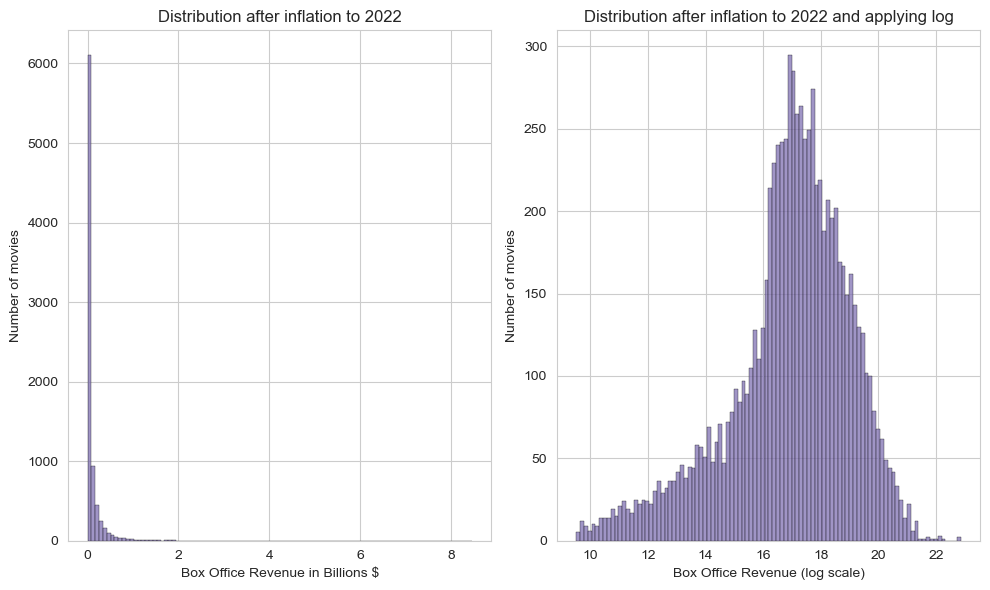

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Plotting the original distribution and the distribution after applying log function on the revenue feature
sns.histplot(data=movie_with_inflation, x=movie_with_inflation['Revenue_with_inflation']/1e9, bins=100, color=sns.color_palette("deep")[4], edgecolor='black', ax=ax1)
ax1.set(title='Distribution after inflation to 2022',
        xlabel='Box Office Revenue in Billions $',
        ylabel='Number of movies')

# Distribution after applying log
sns.histplot(data=movie_with_inflation, x='log_revenues', bins=100, edgecolor='black', color=sns.color_palette("deep")[4],ax=ax2)
ax2.set(title='Distribution after inflation to 2022 and applying log',
        xlabel='Box Office Revenue (log scale)',
        ylabel='Number of movies')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['Distribution of revenues', 'Distribution log revenues'])

# Plotting the original distribution
trace1 = go.Histogram(x=movie_with_inflation['Revenue_with_inflation']/1e9, nbinsx=100, marker=dict(color='red'))  # Set color to red
fig.add_trace(trace1, row=1, col=1)

# Plotting the distribution after applying log
trace2 = go.Histogram(x=movie_with_inflation['log_revenues'], nbinsx=100, marker=dict(color='red'))  # Set color to red
fig.add_trace(trace2, row=1, col=2)

# Update layout for the first subplot
fig.update_xaxes(title_text='Box Office Revenue in Billions $', row=1, col=1)
fig.update_yaxes(title_text='Number of movies', row=1, col=1)

# Update layout for the second subplot
fig.update_xaxes(title_text='Box Office Revenue (log scale)', row=1, col=2)
fig.update_yaxes(title_text='Number of movies', row=1, col=2)

# Update overall layout
fig.update_layout(title_text='Box Office Revenue Distribution Analysis', showlegend=False)

# Center the titles
fig.update_layout(title_x=0.5, title_y=0.9, title_xanchor='center', title_yanchor='top')

# Save the interactive plot as an HTML file
fig.write_html("assets/plots/box_office_distribution.html")
fig.show()


Now that he has seen that he should use logs, Zokomo looks at the effect of applying the inflation to the revenues across the years.

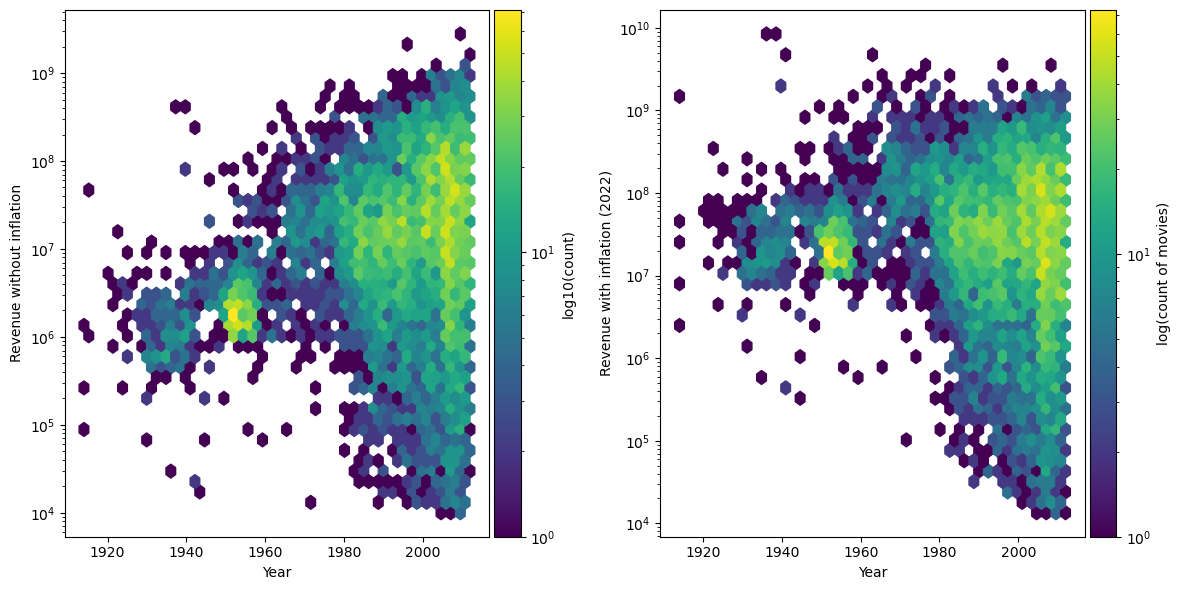

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot for Revenue without inflation
hb1 = ax1.hexbin(movie_with_inflation['Year'], movie_with_inflation['Movie_box_office_revenue'],
                 gridsize=40, bins='log', yscale='log', cmap='viridis')
ax1.set_xlabel('Year')
ax1.set_ylabel('Revenue without inflation')
cb1 = fig.colorbar(hb1, ax=ax1, pad=0.01)
cb1.set_label('log10(count)')

# Plot for Revenue with inflation
hb2 = ax2.hexbin(movie_with_inflation['Year'], movie_with_inflation['Revenue_with_inflation'],
                 gridsize=40, bins='log', yscale='log', cmap='viridis')
ax2.set_xlabel('Year')
ax2.set_ylabel('Revenue with inflation (2022)')
cb2 = fig.colorbar(hb2, ax=ax2, pad=0.01)
cb2.set_label('log(count of movies)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Zokomo notices that Revenues with Inflation show effectively higher revenues for old movies, but, other than that, it is actually resulting in a more similar distribution across the years. He is also saying: "the highest revenues for old movies are now surpassing the other movies. The inflation has huge impact on old movies that it makes them outliers, and even the most recent revenues are inflated since I am considering the inflation with respect tp 2022, to make it more reprensentative. "

# Actors

In [24]:
path = "csv_for_story/top_actors.csv"
top_actors = pd.read_csv(path)

Zokomo indicates that from now on, as in many following feature analysis, he will be averaging log_revenues instead of averaging revenues. He says " this corresponds to computing the geometric mean instead of an arithmetic mean with the objective of gaining statistical stability. The geometric mean tends to be less sensitive to extreme values (outliers) compared to the arithmetic mean. This makes it a more robust measure in situations where there are significant variations in the data, since it represents better the central tendency. In my case, it is useful to penalize the big variances in revenues thus focusing on the consistency of the contribution of the analysed feature. "

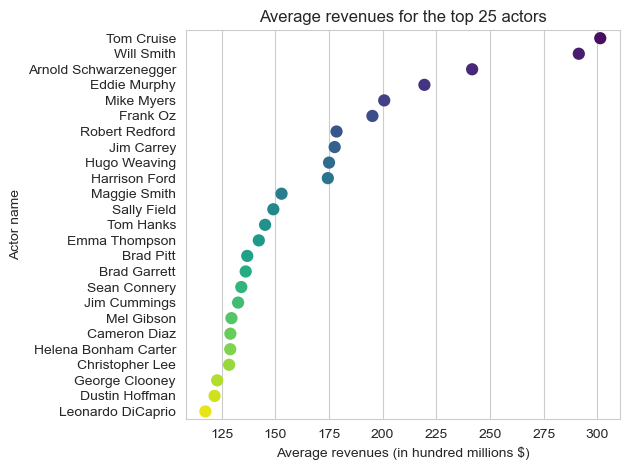

In [25]:
# Plot the geometric mean revenues for the top 25 actors
sns.pointplot(y='Actor_name', x='revenues_in_millions', data=top_actors.head(25), palette='viridis', errorbar=None)
plt.title('Average revenues for the top 25 actors')
plt.xlabel('Average revenues (in hundred millions $)')
plt.ylabel('Actor name')
plt.tight_layout()
plt.show()

In [28]:

# Create a scatter plot which is equivalent to Seaborn's pointplot
fig = px.scatter(top_actors.head(25), y='Actor_name', x='revenues_in_millions', 
                 color='Actor_name',  # Use a distinct color for each actor
                 title='Average revenues for the top 25 actors',
                 labels={'revenues_in_millions': 'Average revenues (in hundred millions $)',
                         'Actor_name': 'Actor name'},
                 height=800  # Adjust height to accommodate all actor names
                )

# Update the layout for a cleaner look
fig.update_layout(showlegend=False)  # Hide the legend if it's not needed
fig.update_traces(marker=dict(size=10))  # Adjust marker size as needed
fig.update_yaxes(categoryorder='total ascending')  # Sort the y-axis based on the values if needed

# Center the title and set the plot to allow for vertical scrolling
fig.update_layout(
    title_text='Average revenues for the top 25 actors',
    title_x=0.5,  # Center the title
    yaxis_fixedrange=False  # Allows for vertical scrolling on the y-axis
)

# The next line would be used to save the figure as an HTML file
# fig.write_html('path_to_file.html')

# Show the figure in the output (this line can be omitted if using in a script)
fig.show()

fig.write_html("assets/plots/actors_revenue.html")

Zokomo also says: " With geometric mean for actors, I am favoring those with consistent success over the ones who only participated in a few hits. A clear demonstration is that selecting the top actors with arithmetic mean results in many actors from harry potter or other sagas. This is because there are many film in these sagas with high revenues, which is boosting the actors mean revenues despite them not having much successful movies. "

# Release months

In [46]:
path = "csv_for_story/months_df.csv"
months_df = pd.read_csv(path)

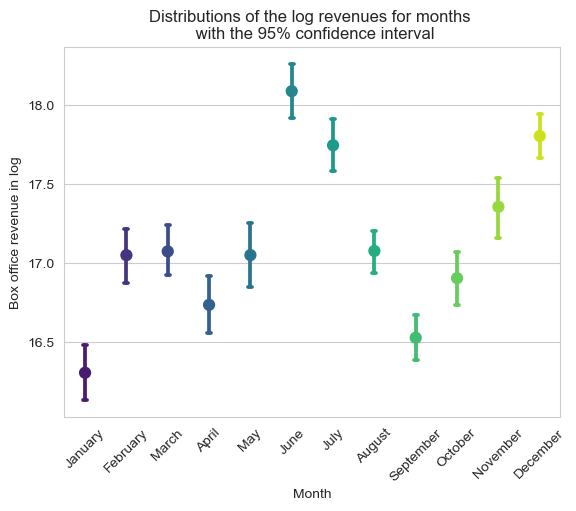

In [47]:
# boxplot of the revenues for each month
ax = sns.pointplot(x='Month', y='log_revenues', data=months_df, palette='viridis', capsize=0.1)
plt.title("Distributions of the log revenues for months \n with the 95% confidence interval")
plt.ylabel("Box office revenue in log")
plt.xlabel("Month")
# Customize x-axis labels
custom_labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October","November", "December"]
ax.set_xticklabels(custom_labels, rotation=45)
plt.show()

In [53]:
from scipy import stats
import pandas as pd
import plotly.graph_objects as go

# Load the DataFrame
path = "csv_for_story/months_df.csv"
months_df = pd.read_csv(path)

# Group by 'Month' and calculate mean and standard error of the mean (SEM)
monthly_stats = months_df.groupby('Month')['log_revenues'].agg(['mean', 'count', 'std']).reset_index()

# Calculate the 95% CI using the t-distribution
confidence_level = 0.95
monthly_stats['ci_95'] = monthly_stats.apply(
    lambda row: stats.t.ppf((1 + confidence_level) / 2, row['count'] - 1) * (row['std'] / (row['count'] ** 0.5)), axis=1)

# Create a point plot using Plotly Graph Objects
fig = go.Figure()

# Add the mean revenue as a scatter plot
fig.add_trace(go.Scatter(
    x=monthly_stats['Month'],
    y=monthly_stats['mean'],
    mode='markers+lines',
    error_y=dict(
        type='data', # value of error bar given in data coordinates
        array=monthly_stats['ci_95'],
        visible=True
    ),
    name='Mean Log Revenue',
    line=dict(color='red'),  # Set the line color to red
    marker=dict(color='red')  # Set the marker color to red
))



# Customize the x-axis labels to show month names
custom_labels = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Update the x-axis with the custom labels and rotate them for better visibility
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=custom_labels,
    ),
    xaxis_title="Month",
    yaxis_title="Box office revenue in log",
    title="Distributions of the log revenues for months with the 95% confidence interval",
    title_x=0.5
)

# Save the figure as an HTML file
fig.write_html("assets/plots/months_revenue.html")

# This code ends here, the plot can be viewed by opening the saved HTML file

fig.show()


Our bear is stunned by the results he got. He observes that the best month to launch a movie is June, with a significant difference (no overlapping CIs), followed by December and July. He assumes that this aligns with the months when students typically have vacations, which might explain the results.

# Women percentage

Zokomo is now interested in the proportion of men and women actors in movies. He decides to analyze whether there is a particular proportion that generates higher box office revenues. To this extend, he is studying the percentage of actresses in movies and how they relate to the box office revenues.

In [69]:
path = "csv_for_story/gender_df.csv"
gender_df = pd.read_csv(path)

For that, our scientist is trying to perform an equal frequency discretization of the percentage of women, dividing percentages into 8 groups where there is an equal number of movies in each group. He thinks aht by doing it this way, then instead of feeding the final formula with an actual percentage of women, he will only use categorical variables.

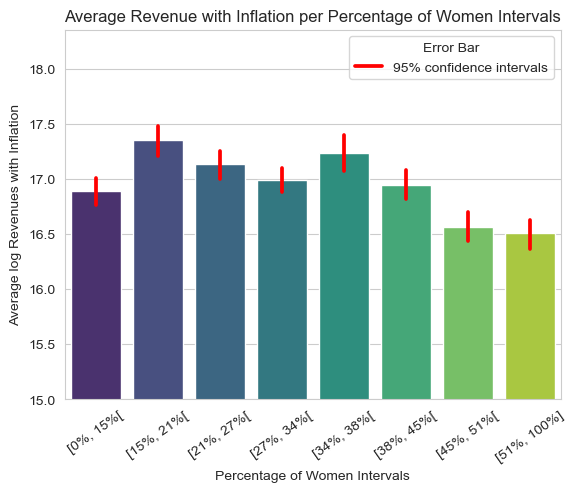

In [71]:
# Boxplot
ax = sns.barplot(x=gender_df['group'], y=gender_df['log_revenues'],palette='viridis', errcolor='red')

# Customize x-axis labels
custom_labels = ["[0%, 15%[", "[15%, 21%[", "[21%, 27%[", "[27%, 34%[", "[34%, 38%[", "[38%, 45%[","[45%, 51%[", "[51%, 100%]"]

ax.set_xticklabels(custom_labels, rotation=35)

plt.ylim(15, None)
plt.xlabel('Percentage of Women Intervals')
plt.ylabel('Average log Revenues with Inflation')
plt.title('Average Revenue with Inflation per Percentage of Women Intervals')

# Add legend
plt.legend(title='Error Bar', labels=['95% confidence intervals'])

plt.show()

From the plot, Zokomo notices that movies with women percentages between 15% and 21% result in significantly higher box office revenues, followed by movies that have women percentages between 34% and 38%. While movies with 45% to 100% have significantly lower mean box office revenues, and their confidence intervals don't intersect with other intervals.

In [94]:
import plotly.express as px
import pandas as pd
from scipy.stats import t

grouped_data = gender_df.groupby('group')['log_revenues'].agg(mean='mean', std='std', n='count').reset_index()
display(grouped_data)
# Calculate the 95% confidence interval
critical_value = t.ppf(0.975, grouped_data['n'] - 1)  # Two-tailed t-test for 95% CI
grouped_data['ci_95'] = critical_value * (grouped_data['std'] / grouped_data['n'] ** 0.5)

# Create the interactive bar plot
fig = px.bar(
    grouped_data, 
    x='group', 
    y='mean',
    error_y='ci_95',
    labels={'mean': 'Average Log Revenues with Inflation', 'group': 'Percentage of Women Intervals'},
    title='Average Revenue with Inflation per Percentage of Women Intervals',
    color='group',  # Color the bars by group
    color_continuous_scale='Viridis'  # Use the Viridis color scale
)

# Set the y-axis range if needed
fig.update_yaxes(range=[15, None])

# Customize the x-axis labels based on the given intervals
custom_labels = ["[0%, 15%[", "[15%, 21%[", "[21%, 27%[", "[27%, 34%[", "[34%, 38%[", "[38%, 45%[", "[45%, 51%[", "[51%, 100%]"]
fig.update_xaxes(tickvals=grouped_data['group'], ticktext=custom_labels)

# Hide the color scale if it's not desired
fig.update_layout(showlegend=False,title_x=0.5)


# Save the figure as an HTML file
fig.write_html("assets/plots/women_revenue.html")

# The fig.show() command is used to display the plot in an interactive Python environment such as Jupyter Notebook
fig.show()

,group,mean,std,n
0,0,16.889718,2.183399,1177
1,1,17.352263,2.012353,894
2,2,17.135323,2.024248,1034
3,3,16.991490,2.092149,1569
4,4,17.233683,2.002490,491
5,5,16.949693,2.237586,1044
6,6,16.568074,2.117766,958
7,7,16.505155,2.101054,978


In [118]:
import plotly.graph_objects as go
import pandas as pd


grouped_data = gender_df.groupby('group')['log_revenues'].agg(mean='mean', std='std', n='count').reset_index()
# Calculate the 95% confidence interval
critical_value = t.ppf(0.975, grouped_data['n'] - 1)  # Two-tailed t-test for 95% CI
grouped_data['ci_95'] = critical_value * (grouped_data['std'] / grouped_data['n'] ** 0.5)



# Create the bar chart with Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data['group'],
    y=grouped_data['mean'],
    error_y=dict(
        type='data',
        array=grouped_data['ci_95'],
        color='black',
        
        
    ),
      marker_color="red"  # Set the bar color (or use any other color or color scale)
))

# Customize the layout
fig.update_layout(
    title_text='Average Revenue with Inflation per Percentage of Women Intervals',
    xaxis_title='Percentage of Women Intervals',
    yaxis_title='Average Log Revenues with Inflation',
    yaxis=dict(range=[15, max(grouped_data['mean'] +0.2+ grouped_data['ci_95'])]),
    showlegend=False
)

# Customize the x-axis labels based on the given intervals
custom_labels = ["[0%, 15%[", "[15%, 21%[", "[21%, 27%[", "[27%, 34%[", "[34%, 38%[", "[38%, 45%[", "[45%, 51%[", "[51%, 100%]"]
fig.update_xaxes(tickvals=grouped_data['group'], ticktext=custom_labels)

# Hide the color scale if it's not desired
fig.update_layout(showlegend=False, title_x=0.5)


# Save the figure as an HTML file
fig.write_html("assets/plots/women_revenue.html")

# The fig.show() command is used to display the plot in an interactive Python environment such as Jupyter Notebook
fig.show()
